# Programa de Ciencia de Datos, Aprendizaje Automático


**Proyecto**

Estudiantes:

   - *Ricardo Montero Wille*

   - *Esteban Pérez Navarro*

**A continuación se presenta el desarrollo del problema:**

Los datos pertenecen a la empresa a la que Ricardo y yo trabajamos, la cual no se va a revelar el nombre. Estos datos son relativos al desempeño de la entrega de paquetes, y cuentan con diversas variables sobre estos, como por ejemplo, su peso, su tamaño, días estimados para la entrega, entre otros. El problema en este caso consiste en que la organización desea poder predecir si un paquete se va a entregar a un cliente en el tiempo asignado, que según política de la empresa son 10 días hábiles. Esto se realiza con el objetivo de poder prometerle a clientes futuros esto mismo, o si se debe hacer una modificación de la política. 

Se extraen alrededor de 140.000 datos de la base de datos de la organización, relativos a los envíos realizados en el presente año. 


Primero se importan las librerías.

In [15]:
# Imports para tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange

# Imports para graficación
# ==============================================================================

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn.metrics as skm

# Imports para pre-procesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

#Esta línea se utiliza para evitar algunas advertencias que panda tiene
pd.options.mode.chained_assignment = None  # default='warn'

Se procede a leer el archivo que se encuentra subido en github. De esta manera es más sencillo leerlo y no se necesita el archivo en la misma carpeta del notebook. 

In [16]:
archivo = 'https://raw.githubusercontent.com/EstebanPN14/prueba2/main/Package%20v2.csv'
packageDelivery = pd.read_csv(archivo,error_bad_lines=False)
packageDelivery

,ALTR_PROD_SVC_FLG,BO_FLG,CARR_DLV_DAYS,CARR_PKG_DLV_DLAY_MINS,CNTRY_ID,DC_FULF_OP_DAYS,DIM_WGT_FLG,EMBR_PROD_SVC_FLG,ENGR_PROD_SVC_FLG,GBOX_PROD_SVC_FLG,MNGM_PROD_SVC_FLG,ORD_RLSE_TO_DC_MINS,OTHR_PROD_SVC_FLG,PERS_PROD_SVC_FLG,PCK_CNT,PKG_DLVD_BY_QTD_DT_IND,PKG_GRTH,PKG_HT,PKG_LTH,PKG_MER_QTY,PKG_MNFST_DLAY_MINS,PKG_PROD_SVC_FLG,PKG_WDTH,PKG_WGT,SECD_CARR_FLG,SECD_CARR_ONTM_FLG
0,N,N,1,0,USA,4,Y,N,N,N,N,250,N,N,1,Y,52.0,4.0,18.0,2,0,N,13.0,1.575,N,Y
1,N,N,3,0,USA,3,Y,N,N,N,N,31,N,N,1,Y,0.0,0.0,0.0,1,0,N,0.0,0.790,N,Y
2,N,N,6,0,USA,1,Y,N,N,N,N,30,N,N,1,Y,60.0,5.0,22.0,3,0,N,14.0,2.440,N,Y
3,N,N,2,0,USA,2,Y,N,N,N,N,31,N,N,1,Y,0.0,0.0,0.0,1,0,N,0.0,1.525,N,Y
4,N,N,1,0,USA,1,Y,N,N,N,N,30,N,N,1,Y,0.0,0.0,0.0,1,0,N,0.0,1.889,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139832,N,N,1,0,USA,10,Y,N,N,N,Y,34,N,N,1,N,52.0,4.0,18.0,1,0,Y,13.0,1.455,N,Y
139833,N,N,3,-999999,USA,2,Y,N,N,N,N,37,N,N,1,Y,0.0,0.0,0.0,1,0,N,0.0,0.940,N,N
139834,N,N,2,0,USA,2,Y,N,N,N,N,31,N,N,1,Y,60.0,5.0,22.0,1,0,N,14.0,3.090,N,Y
139835,N,N,6,0,USA,3,Y,N,N,N,N,36,N,N,1,N,0.0,0.0,0.0,1,0,N,0.0,0.875,N,Y


Mostramos los tipos de datos que se tiene en el dataframe. De esta manera es más sencillo lograr una visualización de los datos con los que es mejor trabajar.

In [17]:
packageDelivery.dtypes

ALTR_PROD_SVC_FLG          object
BO_FLG                     object
CARR_DLV_DAYS               int64
CARR_PKG_DLV_DLAY_MINS      int64
CNTRY_ID                   object
DC_FULF_OP_DAYS             int64
DIM_WGT_FLG                object
EMBR_PROD_SVC_FLG          object
ENGR_PROD_SVC_FLG          object
GBOX_PROD_SVC_FLG          object
MNGM_PROD_SVC_FLG          object
ORD_RLSE_TO_DC_MINS         int64
OTHR_PROD_SVC_FLG          object
PERS_PROD_SVC_FLG          object
PCK_CNT                     int64
PKG_DLVD_BY_QTD_DT_IND     object
PKG_GRTH                  float64
PKG_HT                    float64
PKG_LTH                   float64
PKG_MER_QTY                 int64
PKG_MNFST_DLAY_MINS         int64
PKG_PROD_SVC_FLG           object
PKG_WDTH                  float64
PKG_WGT                   float64
SECD_CARR_FLG              object
SECD_CARR_ONTM_FLG         object
dtype: object

En la empresa en cuestión, los datos  con valor "-999999" son datos nulos por lo que los reemplazamos por el valor nulo que utiliza el lenguaje, es decir, por NaN, usando la función replace. 

In [18]:
packageDelivery = packageDelivery.replace(-999999,np.NaN)
packageDelivery

,ALTR_PROD_SVC_FLG,BO_FLG,CARR_DLV_DAYS,CARR_PKG_DLV_DLAY_MINS,CNTRY_ID,DC_FULF_OP_DAYS,DIM_WGT_FLG,EMBR_PROD_SVC_FLG,ENGR_PROD_SVC_FLG,GBOX_PROD_SVC_FLG,MNGM_PROD_SVC_FLG,ORD_RLSE_TO_DC_MINS,OTHR_PROD_SVC_FLG,PERS_PROD_SVC_FLG,PCK_CNT,PKG_DLVD_BY_QTD_DT_IND,PKG_GRTH,PKG_HT,PKG_LTH,PKG_MER_QTY,PKG_MNFST_DLAY_MINS,PKG_PROD_SVC_FLG,PKG_WDTH,PKG_WGT,SECD_CARR_FLG,SECD_CARR_ONTM_FLG
0,N,N,1,0.0,USA,4,Y,N,N,N,N,250,N,N,1,Y,52.0,4.0,18.0,2,0.0,N,13.0,1.575,N,Y
1,N,N,3,0.0,USA,3,Y,N,N,N,N,31,N,N,1,Y,0.0,0.0,0.0,1,0.0,N,0.0,0.790,N,Y
2,N,N,6,0.0,USA,1,Y,N,N,N,N,30,N,N,1,Y,60.0,5.0,22.0,3,0.0,N,14.0,2.440,N,Y
3,N,N,2,0.0,USA,2,Y,N,N,N,N,31,N,N,1,Y,0.0,0.0,0.0,1,0.0,N,0.0,1.525,N,Y
4,N,N,1,0.0,USA,1,Y,N,N,N,N,30,N,N,1,Y,0.0,0.0,0.0,1,0.0,N,0.0,1.889,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139832,N,N,1,0.0,USA,10,Y,N,N,N,Y,34,N,N,1,N,52.0,4.0,18.0,1,0.0,Y,13.0,1.455,N,Y
139833,N,N,3,NaN,USA,2,Y,N,N,N,N,37,N,N,1,Y,0.0,0.0,0.0,1,0.0,N,0.0,0.940,N,N
139834,N,N,2,0.0,USA,2,Y,N,N,N,N,31,N,N,1,Y,60.0,5.0,22.0,1,0.0,N,14.0,3.090,N,Y
139835,N,N,6,0.0,USA,3,Y,N,N,N,N,36,N,N,1,N,0.0,0.0,0.0,1,0.0,N,0.0,0.875,N,Y


Revisamos que no queden datos con valores de  "-999999" para que no nos afecte el modelo.

In [19]:
print((packageDelivery == -999999).astype(int).sum())

ALTR_PROD_SVC_FLG         0
BO_FLG                    0
CARR_DLV_DAYS             0
CARR_PKG_DLV_DLAY_MINS    0
CNTRY_ID                  0
DC_FULF_OP_DAYS           0
DIM_WGT_FLG               0
EMBR_PROD_SVC_FLG         0
ENGR_PROD_SVC_FLG         0
GBOX_PROD_SVC_FLG         0
MNGM_PROD_SVC_FLG         0
ORD_RLSE_TO_DC_MINS       0
OTHR_PROD_SVC_FLG         0
PERS_PROD_SVC_FLG         0
PCK_CNT                   0
PKG_DLVD_BY_QTD_DT_IND    0
PKG_GRTH                  0
PKG_HT                    0
PKG_LTH                   0
PKG_MER_QTY               0
PKG_MNFST_DLAY_MINS       0
PKG_PROD_SVC_FLG          0
PKG_WDTH                  0
PKG_WGT                   0
SECD_CARR_FLG             0
SECD_CARR_ONTM_FLG        0
dtype: int64


Ahora, verificamos la cantidad de nulos que quedan en el set de datos

In [20]:
print(packageDelivery.isnull().sum())

ALTR_PROD_SVC_FLG            0
BO_FLG                       0
CARR_DLV_DAYS                0
CARR_PKG_DLV_DLAY_MINS    2222
CNTRY_ID                     0
DC_FULF_OP_DAYS              0
DIM_WGT_FLG                  0
EMBR_PROD_SVC_FLG            0
ENGR_PROD_SVC_FLG            0
GBOX_PROD_SVC_FLG            0
MNGM_PROD_SVC_FLG            0
ORD_RLSE_TO_DC_MINS          0
OTHR_PROD_SVC_FLG            0
PERS_PROD_SVC_FLG            0
PCK_CNT                      0
PKG_DLVD_BY_QTD_DT_IND       0
PKG_GRTH                     0
PKG_HT                       0
PKG_LTH                      0
PKG_MER_QTY                  0
PKG_MNFST_DLAY_MINS        563
PKG_PROD_SVC_FLG             0
PKG_WDTH                     0
PKG_WGT                      0
SECD_CARR_FLG                0
SECD_CARR_ONTM_FLG           0
dtype: int64


Reemplazamos todos los valores nulos con la mediana de cada columna, siendo este uno de los métodos recomendados para rellenar los nulos de un set de datos.

In [21]:
packageDelivery.fillna(packageDelivery.median(), inplace=True)

Se verifica que ya no existan nulos en el set de datos.

In [22]:
print(packageDelivery.isnull().sum())

ALTR_PROD_SVC_FLG         0
BO_FLG                    0
CARR_DLV_DAYS             0
CARR_PKG_DLV_DLAY_MINS    0
CNTRY_ID                  0
DC_FULF_OP_DAYS           0
DIM_WGT_FLG               0
EMBR_PROD_SVC_FLG         0
ENGR_PROD_SVC_FLG         0
GBOX_PROD_SVC_FLG         0
MNGM_PROD_SVC_FLG         0
ORD_RLSE_TO_DC_MINS       0
OTHR_PROD_SVC_FLG         0
PERS_PROD_SVC_FLG         0
PCK_CNT                   0
PKG_DLVD_BY_QTD_DT_IND    0
PKG_GRTH                  0
PKG_HT                    0
PKG_LTH                   0
PKG_MER_QTY               0
PKG_MNFST_DLAY_MINS       0
PKG_PROD_SVC_FLG          0
PKG_WDTH                  0
PKG_WGT                   0
SECD_CARR_FLG             0
SECD_CARR_ONTM_FLG        0
dtype: int64


Reemplazamos los nombres de las columnas a nombres más entendibles para cualquier usuario que vaya a visualizar la data.

In [23]:
packageDelivery.columns = ['Alteration service flag','Backorder flag','Carrier delivery days','Carrier delivery delay minutes'
                    ,'Country ID','Dist Center Fulfilment Ops Days','Dimension weight flag','Embroidery product service flag',
                   'Engraving product service flag', 'Gift box product service flag',
                   'Monogramming product flag','Order release to DC minutes','Other product service flag','Personalization product service flag','Package count','Package delivered by quoted date indicator',
                   'Package girth','Package height', 'Package length','Package merchandise quantity','Package manifest delay minutes','Package product service flag','Package width','Package weight','Second carrier flag','Second carrier on time flag']

In [24]:
packageDelivery

,Alteration service flag,Backorder flag,Carrier delivery days,Carrier delivery delay minutes,Country ID,Dist Center Fulfilment Ops Days,Dimension weight flag,Embroidery product service flag,Engraving product service flag,Gift box product service flag,Monogramming product flag,Order release to DC minutes,Other product service flag,Personalization product service flag,Package count,Package delivered by quoted date indicator,Package girth,Package height,Package length,Package merchandise quantity,Package manifest delay minutes,Package product service flag,Package width,Package weight,Second carrier flag,Second carrier on time flag
0,N,N,1,0.0,USA,4,Y,N,N,N,N,250,N,N,1,Y,52.0,4.0,18.0,2,0.0,N,13.0,1.575,N,Y
1,N,N,3,0.0,USA,3,Y,N,N,N,N,31,N,N,1,Y,0.0,0.0,0.0,1,0.0,N,0.0,0.790,N,Y
2,N,N,6,0.0,USA,1,Y,N,N,N,N,30,N,N,1,Y,60.0,5.0,22.0,3,0.0,N,14.0,2.440,N,Y
3,N,N,2,0.0,USA,2,Y,N,N,N,N,31,N,N,1,Y,0.0,0.0,0.0,1,0.0,N,0.0,1.525,N,Y
4,N,N,1,0.0,USA,1,Y,N,N,N,N,30,N,N,1,Y,0.0,0.0,0.0,1,0.0,N,0.0,1.889,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139832,N,N,1,0.0,USA,10,Y,N,N,N,Y,34,N,N,1,N,52.0,4.0,18.0,1,0.0,Y,13.0,1.455,N,Y
139833,N,N,3,0.0,USA,2,Y,N,N,N,N,37,N,N,1,Y,0.0,0.0,0.0,1,0.0,N,0.0,0.940,N,N
139834,N,N,2,0.0,USA,2,Y,N,N,N,N,31,N,N,1,Y,60.0,5.0,22.0,1,0.0,N,14.0,3.090,N,Y
139835,N,N,6,0.0,USA,3,Y,N,N,N,N,36,N,N,1,N,0.0,0.0,0.0,1,0.0,N,0.0,0.875,N,Y


Seguidamente, se construye un mapa de calor para visualizar las relaciones entre las diferentes variables, logrando dar una idea previa de cuáles variables pueden aportar más al modelo.

<function matplotlib.pyplot.show>

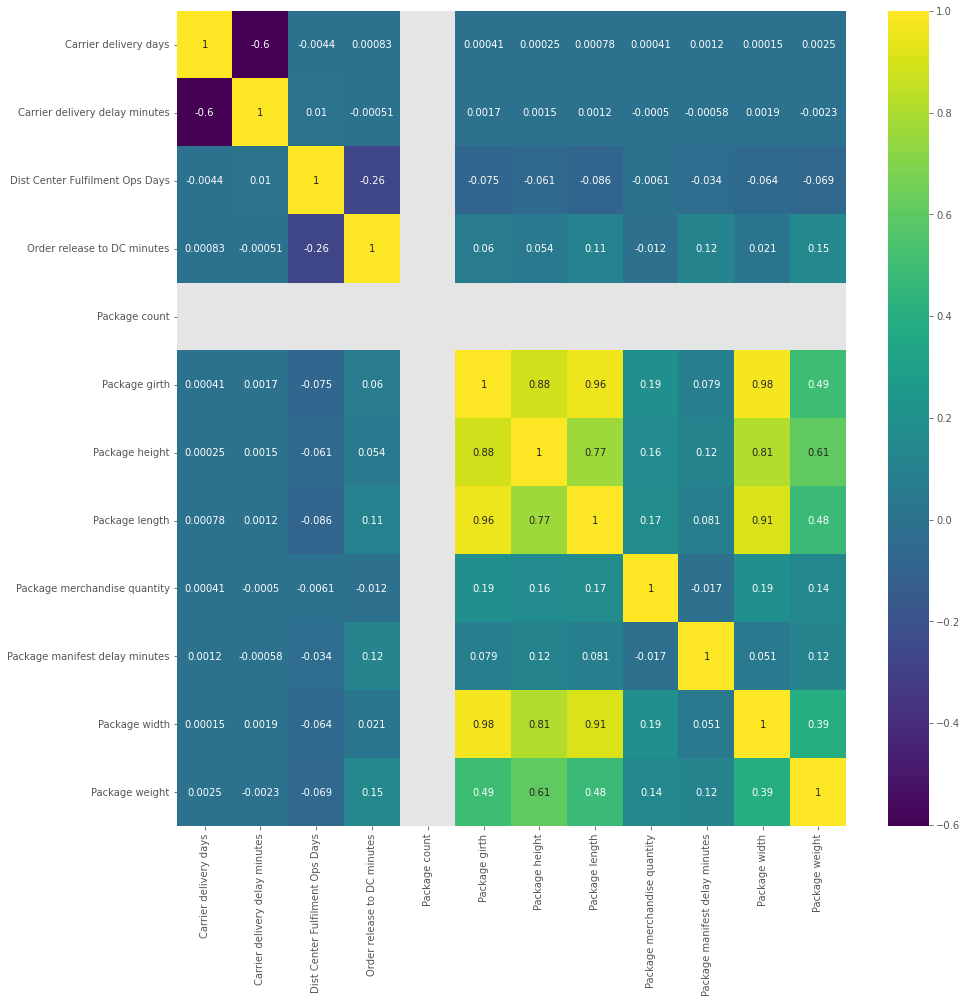

In [25]:
plt.figure(figsize=(15,15))

chart = sns.heatmap(packageDelivery.corr(), annot = True, cmap = 'viridis')
plt.xticks(rotation=90)
plt.show

En el mapa de calor se denota que la variable de "Package count" no tiene valores de correlación, por lo tanto, se decide utilizar un histograma para visualizar la distribución de frecuencia de esta variable. 

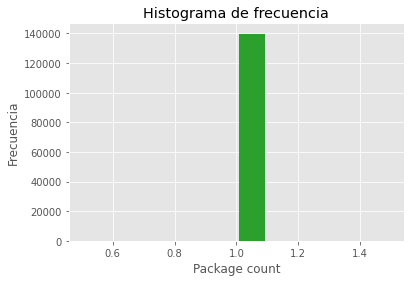

In [26]:
plt.hist(packageDelivery['Package count'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Package count')
plt.ylabel('Frecuencia')


plt.show() 

Usando el histograma, es posible darse cuenta que todos los valores de package count son 1, por lo cual la variable no aporta variabilidad al modelo y puede proceder a eliminarse.

In [27]:
porEliminar = []
porEliminar += ["Package count"]

packageDelivery.drop(porEliminar, axis=1, errors='ignore', inplace=True)
packageDelivery

,Alteration service flag,Backorder flag,Carrier delivery days,Carrier delivery delay minutes,Country ID,Dist Center Fulfilment Ops Days,Dimension weight flag,Embroidery product service flag,Engraving product service flag,Gift box product service flag,Monogramming product flag,Order release to DC minutes,Other product service flag,Personalization product service flag,Package delivered by quoted date indicator,Package girth,Package height,Package length,Package merchandise quantity,Package manifest delay minutes,Package product service flag,Package width,Package weight,Second carrier flag,Second carrier on time flag
0,N,N,1,0.0,USA,4,Y,N,N,N,N,250,N,N,Y,52.0,4.0,18.0,2,0.0,N,13.0,1.575,N,Y
1,N,N,3,0.0,USA,3,Y,N,N,N,N,31,N,N,Y,0.0,0.0,0.0,1,0.0,N,0.0,0.790,N,Y
2,N,N,6,0.0,USA,1,Y,N,N,N,N,30,N,N,Y,60.0,5.0,22.0,3,0.0,N,14.0,2.440,N,Y
3,N,N,2,0.0,USA,2,Y,N,N,N,N,31,N,N,Y,0.0,0.0,0.0,1,0.0,N,0.0,1.525,N,Y
4,N,N,1,0.0,USA,1,Y,N,N,N,N,30,N,N,Y,0.0,0.0,0.0,1,0.0,N,0.0,1.889,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139832,N,N,1,0.0,USA,10,Y,N,N,N,Y,34,N,N,N,52.0,4.0,18.0,1,0.0,Y,13.0,1.455,N,Y
139833,N,N,3,0.0,USA,2,Y,N,N,N,N,37,N,N,Y,0.0,0.0,0.0,1,0.0,N,0.0,0.940,N,N
139834,N,N,2,0.0,USA,2,Y,N,N,N,N,31,N,N,Y,60.0,5.0,22.0,1,0.0,N,14.0,3.090,N,Y
139835,N,N,6,0.0,USA,3,Y,N,N,N,N,36,N,N,N,0.0,0.0,0.0,1,0.0,N,0.0,0.875,N,Y


Seguidamente, se desea analizar la variable de país. Para ello, se utiliza un histograma de frecuencia y luego básicamente una query que nos devuelve la cantidad de datos totales cuyo valor es USA. 

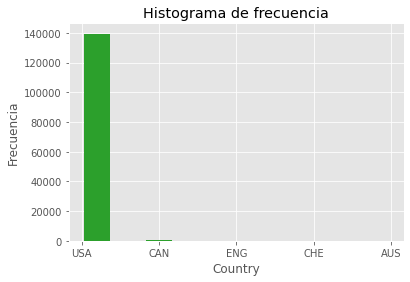

Cantidad de datos de USA:  139397


In [28]:
plt.hist(packageDelivery['Country ID'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Country')
plt.ylabel('Frecuencia')


plt.show() 

USAData = packageDelivery.loc[packageDelivery['Country ID'] == 'USA']


print("Cantidad de datos de USA: ",USAData.shape[0])


Se denota que menos de 500 datos corresponden a países que no son Estados Unidos, lo cual representa alrededor de un 0.35% del total de los datos. Por esto, se determina que el país no es una variable que vaya a añadir variabilidad al modelo, y que por lo tanto, no influye en la capacidad de predicción. Por esto, se procede a eliminarla.

In [29]:
porEliminar += ["Country ID"]

packageDelivery.drop(porEliminar, axis=1, errors='ignore', inplace=True)
packageDelivery

,Alteration service flag,Backorder flag,Carrier delivery days,Carrier delivery delay minutes,Dist Center Fulfilment Ops Days,Dimension weight flag,Embroidery product service flag,Engraving product service flag,Gift box product service flag,Monogramming product flag,Order release to DC minutes,Other product service flag,Personalization product service flag,Package delivered by quoted date indicator,Package girth,Package height,Package length,Package merchandise quantity,Package manifest delay minutes,Package product service flag,Package width,Package weight,Second carrier flag,Second carrier on time flag
0,N,N,1,0.0,4,Y,N,N,N,N,250,N,N,Y,52.0,4.0,18.0,2,0.0,N,13.0,1.575,N,Y
1,N,N,3,0.0,3,Y,N,N,N,N,31,N,N,Y,0.0,0.0,0.0,1,0.0,N,0.0,0.790,N,Y
2,N,N,6,0.0,1,Y,N,N,N,N,30,N,N,Y,60.0,5.0,22.0,3,0.0,N,14.0,2.440,N,Y
3,N,N,2,0.0,2,Y,N,N,N,N,31,N,N,Y,0.0,0.0,0.0,1,0.0,N,0.0,1.525,N,Y
4,N,N,1,0.0,1,Y,N,N,N,N,30,N,N,Y,0.0,0.0,0.0,1,0.0,N,0.0,1.889,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139832,N,N,1,0.0,10,Y,N,N,N,Y,34,N,N,N,52.0,4.0,18.0,1,0.0,Y,13.0,1.455,N,Y
139833,N,N,3,0.0,2,Y,N,N,N,N,37,N,N,Y,0.0,0.0,0.0,1,0.0,N,0.0,0.940,N,N
139834,N,N,2,0.0,2,Y,N,N,N,N,31,N,N,Y,60.0,5.0,22.0,1,0.0,N,14.0,3.090,N,Y
139835,N,N,6,0.0,3,Y,N,N,N,N,36,N,N,N,0.0,0.0,0.0,1,0.0,N,0.0,0.875,N,Y


En los siguientes dos histogramas, logramos visualizar la data que se encuentra en la columna "Package manifest delay minutes" y nos damos cuenta que solo el 0.2% de la data no es similar a cero, por lo que procedemos a eliminar esta columna ya que no proporciona relevancia.

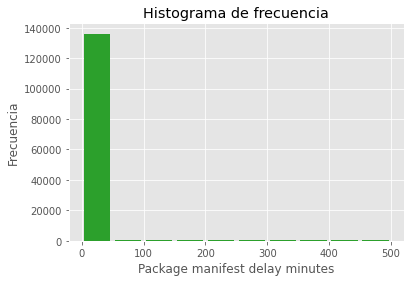

In [30]:
plt.hist(packageDelivery['Package manifest delay minutes'], color = '#2ca02c', rwidth=0.85, range=[0, 500])
plt.title('Histograma de frecuencia')
plt.xlabel('Package manifest delay minutes')
plt.ylabel('Frecuencia')


plt.show() 

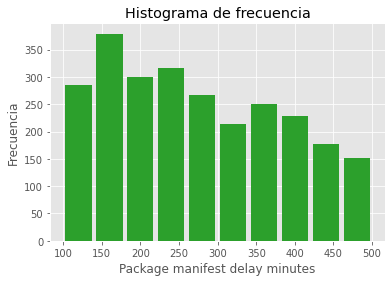

In [31]:
plt.hist(packageDelivery['Package manifest delay minutes'], color = '#2ca02c', rwidth=0.85, range=[100, 500])
plt.title('Histograma de frecuencia')
plt.xlabel('Package manifest delay minutes')
plt.ylabel('Frecuencia')


plt.show() 

Asímismo podemos ver que la data de las siguientes columnas no es relevante para nuestro modelo porque más del 95% de su data es de la misma clase, por lo que no aporta variabilidad en la predicción de la variable de respuesta: 

- "Embroidery product service flag"
- "Engraving product service flag"
- "Gift box product service flag"
- "Personalization product service flag"
- "Other product service flag"
- "Second carrier flag"
- "Alteration service flag"

A continuación, corremos los histogramas correspondientes para el análisis de estas variables.

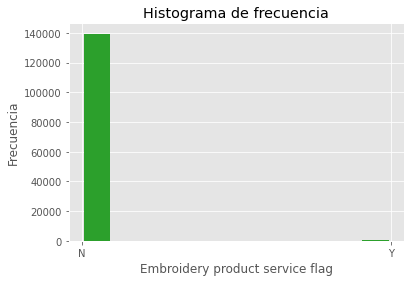

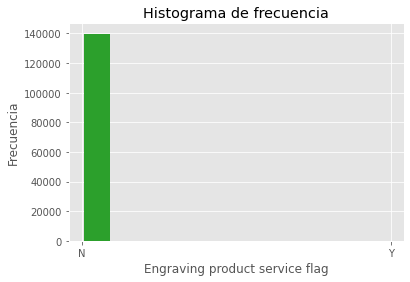

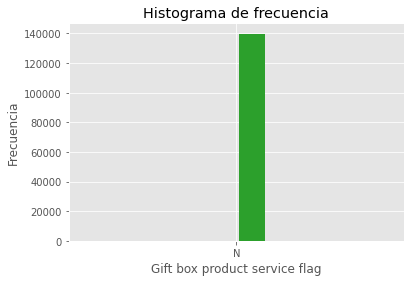

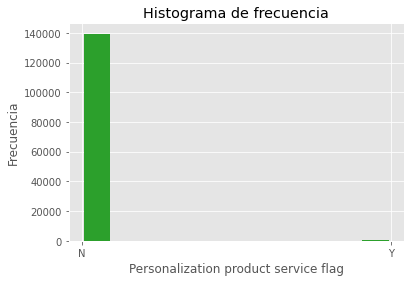

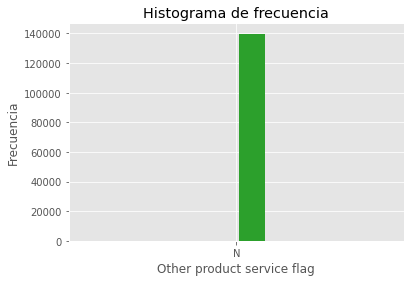

In [32]:
plt.hist(packageDelivery['Embroidery product service flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Embroidery product service flag')
plt.ylabel('Frecuencia')


plt.show() 

plt.hist(packageDelivery['Engraving product service flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Engraving product service flag')
plt.ylabel('Frecuencia')


plt.show() 

plt.hist(packageDelivery['Gift box product service flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Gift box product service flag')
plt.ylabel('Frecuencia')


plt.show() 


plt.hist(packageDelivery['Personalization product service flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Personalization product service flag')
plt.ylabel('Frecuencia')


plt.show() 

plt.hist(packageDelivery['Other product service flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Other product service flag')
plt.ylabel('Frecuencia')


plt.show() 




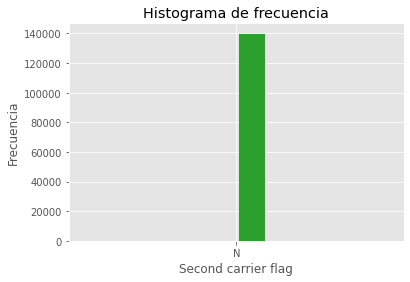

In [33]:
plt.hist(packageDelivery['Second carrier flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Second carrier flag')
plt.ylabel('Frecuencia')


plt.show() 


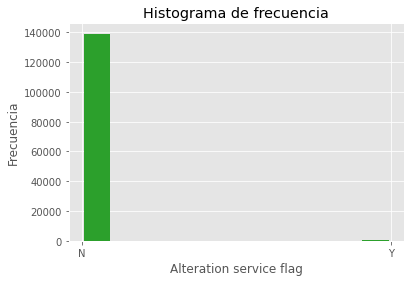

In [34]:
plt.hist(packageDelivery['Alteration service flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Alteration service flag')
plt.ylabel('Frecuencia')


plt.show() 

Por otro lado, la data de las siguientes columnas sí tiene al menos un 5% de datos que pertenecen a más de una clase, por lo que decidimos dejar esas columnas en el dataframe, ya que pueden aportar a la capacidad de predicción:

- "Package product service flag"
- "Backorder flag"
- "Second carrier on time flag"
- "Dimension weight flag"
- "Monogramming product flag"

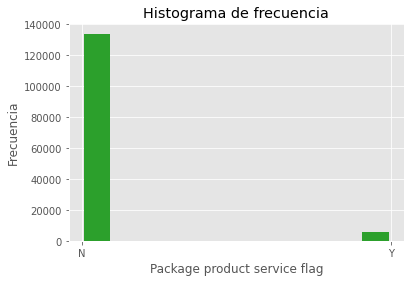

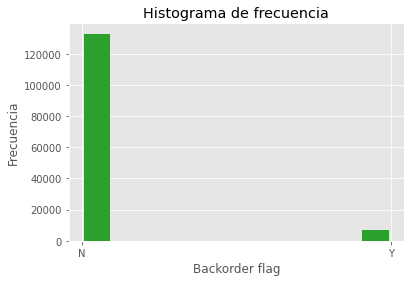

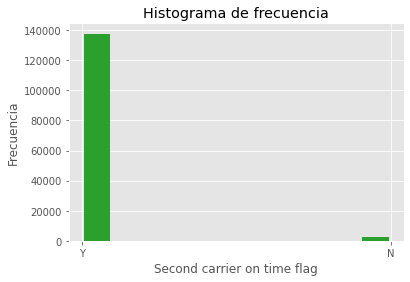

In [35]:
plt.hist(packageDelivery['Package product service flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Package product service flag')
plt.ylabel('Frecuencia')


plt.show() 

plt.hist(packageDelivery['Backorder flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Backorder flag')
plt.ylabel('Frecuencia')


plt.show() 

plt.hist(packageDelivery['Second carrier on time flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Second carrier on time flag')
plt.ylabel('Frecuencia')


plt.show() 

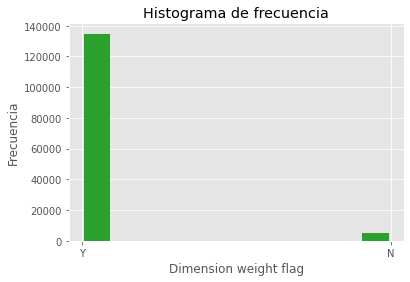

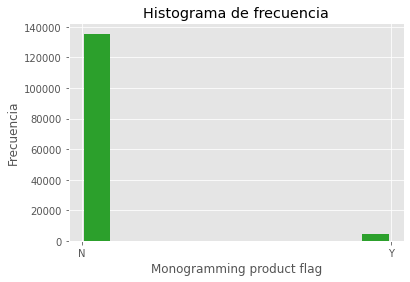

In [36]:
plt.hist(packageDelivery['Dimension weight flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Dimension weight flag')
plt.ylabel('Frecuencia')


plt.show() 

plt.hist(packageDelivery['Monogramming product flag'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia')
plt.xlabel('Monogramming product flag')
plt.ylabel('Frecuencia')


plt.show() 

Procedemos a remover las columnas previamente mencionadas.

In [37]:
porEliminar += ["Package manifest delay minutes", 'Embroidery product service flag', 'Engraving product service flag', 'Gift box product service flag', 
                'Personalization product service flag', 'Other product service flag', 'Second carrier flag', 'Alteration service flag']

packageDelivery.drop(porEliminar, axis=1, errors='ignore', inplace=True)
packageDelivery

,Backorder flag,Carrier delivery days,Carrier delivery delay minutes,Dist Center Fulfilment Ops Days,Dimension weight flag,Monogramming product flag,Order release to DC minutes,Package delivered by quoted date indicator,Package girth,Package height,Package length,Package merchandise quantity,Package product service flag,Package width,Package weight,Second carrier on time flag
0,N,1,0.0,4,Y,N,250,Y,52.0,4.0,18.0,2,N,13.0,1.575,Y
1,N,3,0.0,3,Y,N,31,Y,0.0,0.0,0.0,1,N,0.0,0.790,Y
2,N,6,0.0,1,Y,N,30,Y,60.0,5.0,22.0,3,N,14.0,2.440,Y
3,N,2,0.0,2,Y,N,31,Y,0.0,0.0,0.0,1,N,0.0,1.525,Y
4,N,1,0.0,1,Y,N,30,Y,0.0,0.0,0.0,1,N,0.0,1.889,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139832,N,1,0.0,10,Y,Y,34,N,52.0,4.0,18.0,1,Y,13.0,1.455,Y
139833,N,3,0.0,2,Y,N,37,Y,0.0,0.0,0.0,1,N,0.0,0.940,N
139834,N,2,0.0,2,Y,N,31,Y,60.0,5.0,22.0,1,N,14.0,3.090,Y
139835,N,6,0.0,3,Y,N,36,N,0.0,0.0,0.0,1,N,0.0,0.875,Y


El siguiente paso consiste en diagramar la variable que se va a utilizar como variable de respuesta, es decir, la que queremos predecir. 

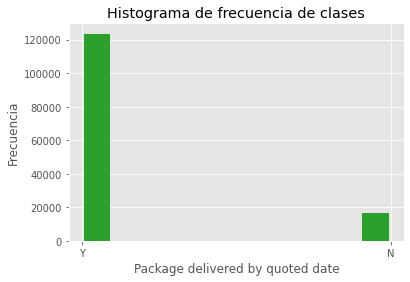

In [38]:
plt.hist(packageDelivery['Package delivered by quoted date indicator'], color = '#2ca02c', rwidth=0.85)
plt.title('Histograma de frecuencia de clases')
plt.xlabel('Package delivered by quoted date')
plt.ylabel('Frecuencia')


plt.show() 

Utilizando el histograma, ya tenemos un indicio de que las clases se encuentran desbalanceadas, y que eso puede suponer un problema a la hora de predecir. Para confirmarlo, visualizamos el número de paquetes que fueron entregados a tiempo y los que no de acuerdo a la data del dataframe.

In [39]:
packagesYES = packageDelivery.loc[packageDelivery['Package delivered by quoted date indicator'] == 'Y']
packagesNO = packageDelivery.loc[packageDelivery['Package delivered by quoted date indicator'] == 'N']

print("Cantidad de paquetes entregados a tiempo: ",packagesYES.shape[0])
print("Cantidad de paquetes NO entregados a tiempo: ",packagesNO.shape[0])

Cantidad de paquetes entregados a tiempo:  123516
Cantidad de paquetes NO entregados a tiempo:  16321


Dado que la diferencia es de más de 100.000 datos entre ambas clases, procedemos a extraer la misma cantidad de filas de data de paquetes entregados que de no entregados, para poder realizar predicciones con resultados mejores y más precisos. Seguidamente juntamos la data con la de los paquetes no entregados y realizamos un shuffle para mezclar la data y que no esté en un orden específico.

In [40]:
packagesYES_filtrados = packagesYES.head(16321)

In [41]:
packages_nuevo = pd.concat([packagesNO,packagesYES_filtrados])

In [42]:
from sklearn.utils import shuffle

packages_revuelto = shuffle(packages_nuevo)

packages_NN = packages_revuelto

El siguiente paso consiste en codificar las variables categóricas, para que puedan ser procesadas por el modelo que se va a utilizar.

In [43]:
packages_revuelto["Backorder flag"] = packages_revuelto["Backorder flag"].astype('category')
packages_revuelto["Backorder flag"] = packages_revuelto["Backorder flag"].cat.codes

packages_revuelto["Dimension weight flag"] = packages_revuelto["Dimension weight flag"].astype('category')
packages_revuelto["Dimension weight flag"] = packages_revuelto["Dimension weight flag"].cat.codes

packages_revuelto["Monogramming product flag"] = packages_revuelto["Monogramming product flag"].astype('category')
packages_revuelto["Monogramming product flag"] = packages_revuelto["Monogramming product flag"].cat.codes

packages_revuelto["Package delivered by quoted date indicator"] = packages_revuelto["Package delivered by quoted date indicator"].astype('category')
packages_revuelto["Package delivered by quoted date indicator"] = packages_revuelto["Package delivered by quoted date indicator"].cat.codes

packages_revuelto["Package product service flag"] = packages_revuelto["Package product service flag"].astype('category')
packages_revuelto["Package product service flag"] = packages_revuelto["Package product service flag"].cat.codes

packages_revuelto["Second carrier on time flag"] = packages_revuelto["Second carrier on time flag"].astype('category')
packages_revuelto["Second carrier on time flag"] = packages_revuelto["Second carrier on time flag"].cat.codes

packages_revuelto

,Backorder flag,Carrier delivery days,Carrier delivery delay minutes,Dist Center Fulfilment Ops Days,Dimension weight flag,Monogramming product flag,Order release to DC minutes,Package delivered by quoted date indicator,Package girth,Package height,Package length,Package merchandise quantity,Package product service flag,Package width,Package weight,Second carrier on time flag
62712,1,4,0.0,15,1,0,30,0,0.0,0.0,0.0,1,0,0.00,0.790,1
11809,0,1,0.0,1,1,1,39,1,52.0,4.0,18.0,1,1,13.00,0.880,1
51425,0,1,0.0,4,1,0,31,0,52.0,4.0,18.0,3,0,13.00,3.210,1
49391,0,1,0.0,20,1,0,31,0,63.0,7.0,25.5,1,1,11.75,7.300,1
62060,0,5,0.0,1,0,0,34,0,64.0,6.0,22.0,1,0,15.00,8.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89329,0,5,0.0,4,1,0,34,0,60.0,5.0,22.0,3,0,14.00,3.380,1
61710,0,6,0.0,5,1,0,39,0,43.0,2.5,17.0,1,0,10.50,0.228,1
4018,1,4,0.0,25,1,1,42,0,60.0,5.0,22.0,1,1,14.00,1.280,1
4773,0,2,0.0,1,1,0,36,1,51.0,6.0,15.0,1,0,12.00,3.830,0


Seguidamente dividimos la data en X y Y para poder realizar predicciones, siendo X la data del dataframe sin la columna que se quiere predecir y "Y" la columna de datos que requiere ser predicha.

In [44]:
X = packages_revuelto.drop('Package delivered by quoted date indicator', axis = 1)
y = packages_revuelto['Package delivered by quoted date indicator']

Se parten los datos en entrenamiento y testeo, usando un 30% para el testeo, según biblliografía.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Random Forest**

Una vez limpios, analizados inicialmente y procesados los datos, se continua aplicando el modelo de aprendizaje automático. En este caso, el modelo elegido es Random Forest, dada su capacidad predictiva potente al ser un método de ensamble. Se selecciona por la complejidad de los datos. 

Inicialmente se utilizan 100 estimadores o árboles para correr el modelo.

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(random_state = 1, n_estimators = 100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Utilizando la función accuracy_score de metrics, perteneciente a sklearn, se obtiene una precisión de 83,41%. Esto resulta sumamente alto como un resultado inicial, significando que el modelo tiene una gran capacidad para predecir la variable de respuesta.

In [47]:
from sklearn import metrics

print("Precisión:",metrics.accuracy_score(y_test, y_pred))

Precisión: 0.8310017359338303


Ahora, se quiere saber cuál es la importancia de cada variable del modelo planteado, para saber a cuáles prestarle más atención, esto se realiza usando la función feature_importances y metiéndolo en un dataframe de pandas. 

In [48]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Dist Center Fulfilment Ops Days    0.308761
Package weight                     0.196185
Carrier delivery days              0.149475
Backorder flag                     0.117438
Order release to DC minutes        0.105618
Package merchandise quantity       0.032815
Package length                     0.016840
Package height                     0.016347
Package girth                      0.016345
Package width                      0.015539
Dimension weight flag              0.012814
Package product service flag       0.005604
Second carrier on time flag        0.002920
Monogramming product flag          0.002784
Carrier delivery delay minutes     0.000516
dtype: float64

Seguidamente realizamos un gráfico de barras para visualizar la importancia de las características del mismo. Esto se realiza en saborn.

No handles with labels found to put in legend.


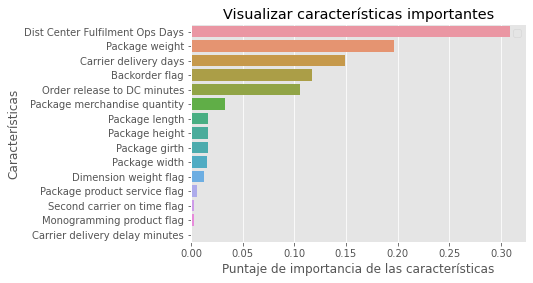

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Puntaje de importancia de las características')
plt.ylabel('Características')
plt.title("Visualizar características importantes")
plt.legend()
plt.show()

Aquí se denota que hay 5 variables que explican el 85% de la variabilidad del modelo, lo cual indica que si se desea dejar de medir las demás, es muy probable que el modelo no empeore, y que la entrega a tiempo del paquete pueda predecirse solamente tomando en cuenta los días de operación del centro de distribución, el peso del paquete, los días de entrega del repartidor, el estado de backorder y la estimación del tiempo que dura la orden en llegar al centro de distribución.

**Tuneo de hiperparámetros del random forest**

Procedemos a realizar gráficos con una curva de validación del random forest para visualizar el puntaje del entrenamiento del mismo y el de su validación, utilizando la media y la desviación estándar, vs el número de estimadores y su profundidad máxima, ambos hiperparámetros del modelo.

En el caso de los estimadores, se busca en el rango de 0 a 200, con aumentos de 10.

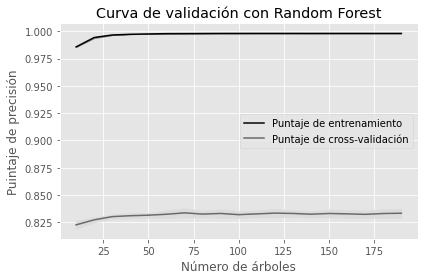

In [51]:
from sklearn.model_selection import validation_curve

param_range = np.arange(0, 200,10 )

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)


test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Puntaje de entrenamiento", color="black")
plt.plot(param_range, test_mean, label="Puntaje de cross-validación", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Curva de validación con Random Forest")
plt.xlabel("Número de árboles")
plt.ylabel("Puntaje de precisión")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Esta curva de validación indica que el puntaje de entrenamiento se mantiene sumamente alto sin importar el número de árboles que se esté utilizando. Sin embargo, se denota que el puntaje de validación tiene una leve mejoría al utilizar 75 árboles. Este es un buen valor porque, al no ser tan alto, permite que no se caiga en overfitting.

Para la profundidad máxima se usa una búsqueda entre el rango de 0 a 300, con aumentos de 15. 

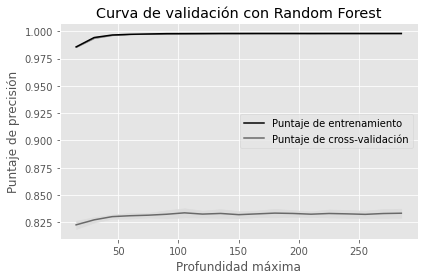

In [52]:
param_range = np.arange(0, 300,15 )

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

plt.plot(param_range, train_mean, label="Puntaje de entrenamiento", color="black")
plt.plot(param_range, test_mean, label="Puntaje de cross-validación", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Curva de validación con Random Forest")
plt.xlabel("Profundidad máxima")
plt.ylabel("Puntaje de precisión")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

De nuevo, la precisión del modelo se mantiene bastante constante para el entrenamiento, con una mejoría apartir de la profundidad de 20. Sin embargo, se denota que el mejor puntaje de validación se obtiene alrededor de los 110. Este es un buen valor también porque permite que el modelo no caiga en overfitting.

Creamos nuevamente un clasificador gaussiano para entrenar el modelo de nuevo pero con los hiperparámetros encontrados en el tuneo.

In [57]:
clf=RandomForestClassifier(random_state = 1, n_estimators = 75, max_depth =110)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [58]:
from sklearn import metrics

print("Precisión:",metrics.accuracy_score(y_test, y_pred))

Precisión: 0.8321249872357807


Usando los hiperparámetros encontrados en el tuneo, se logra mejorar la precisión del modelo de un 83,10% a un 83,24%. La mejora es poca, sin embargo, aplicada a gran escala puede significar que muchos más paquetes van a ser clasificados correctamente. 

**Red neuronal**

Para contrastar los resultados del random forest, se decide también ejecutarle una red neuronal a los datos. 

Primero, copiamos un dataset previo a la codificación realizada para el random forest, dado que en este caso se va a utilizar one hot encoding para la red. 

In [59]:
packages_NN = shuffle(packages_nuevo)
packages_NN

,Backorder flag,Carrier delivery days,Carrier delivery delay minutes,Dist Center Fulfilment Ops Days,Dimension weight flag,Monogramming product flag,Order release to DC minutes,Package delivered by quoted date indicator,Package girth,Package height,Package length,Package merchandise quantity,Package product service flag,Package width,Package weight,Second carrier on time flag
2109,N,5,0.0,1,Y,N,37,Y,59.14,5.75,18.38,2,N,14.63,6.545,Y
13186,N,6,0.0,2,Y,N,13,Y,0.00,0.00,0.00,1,N,0.00,2.485,Y
6511,N,3,0.0,2,Y,N,30,Y,0.00,0.00,0.00,1,N,0.00,0.540,Y
7499,N,3,0.0,4,Y,N,33,Y,43.00,2.50,17.00,2,N,10.50,2.075,Y
5578,N,4,0.0,1,Y,N,39,Y,45.00,3.00,17.00,2,N,11.00,0.711,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,N,3,0.0,4,Y,N,37,N,52.00,4.00,18.00,2,N,13.00,3.400,Y
30607,N,1,0.0,6,Y,N,35,N,51.00,6.00,15.00,2,N,12.00,3.920,Y
2524,N,1,0.0,4,Y,N,69,Y,39.00,5.00,13.00,1,N,8.00,0.310,Y
3012,N,1,0.0,3,Y,N,44,Y,52.00,4.00,18.00,2,N,13.00,2.760,Y


Se divide nuevamente en el dataframe de X y el de Y.

In [60]:
X = packages_NN.drop('Package delivered by quoted date indicator', axis = 1)
y = packages_NN['Package delivered by quoted date indicator']

Seguidamente realizamos un one-hot encoding con la data de las columnas, usando la función get_dummies:

- "Backorder flag"
- "Dimension weight flag"
- "Monogramming product flag"
- "Package product service flag"
- "Second carrier on time flag"

In [61]:
# One-hot encoding 
X_procesado = pd.get_dummies(X, columns=['Backorder flag','Dimension weight flag','Monogramming product flag','Package product service flag','Second carrier on time flag'])
X_procesado

,Carrier delivery days,Carrier delivery delay minutes,Dist Center Fulfilment Ops Days,Order release to DC minutes,Package girth,Package height,Package length,Package merchandise quantity,Package width,Package weight,Backorder flag_N,Backorder flag_Y,Dimension weight flag_N,Dimension weight flag_Y,Monogramming product flag_N,Monogramming product flag_Y,Package product service flag_N,Package product service flag_Y,Second carrier on time flag_N,Second carrier on time flag_Y
2109,5,0.0,1,37,59.14,5.75,18.38,2,14.63,6.545,1,0,0,1,1,0,1,0,0,1
13186,6,0.0,2,13,0.00,0.00,0.00,1,0.00,2.485,1,0,0,1,1,0,1,0,0,1
6511,3,0.0,2,30,0.00,0.00,0.00,1,0.00,0.540,1,0,0,1,1,0,1,0,0,1
7499,3,0.0,4,33,43.00,2.50,17.00,2,10.50,2.075,1,0,0,1,1,0,1,0,0,1
5578,4,0.0,1,39,45.00,3.00,17.00,2,11.00,0.711,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,3,0.0,4,37,52.00,4.00,18.00,2,13.00,3.400,1,0,0,1,1,0,1,0,0,1
30607,1,0.0,6,35,51.00,6.00,15.00,2,12.00,3.920,1,0,0,1,1,0,1,0,0,1
2524,1,0.0,4,69,39.00,5.00,13.00,1,8.00,0.310,1,0,0,1,1,0,1,0,0,1
3012,1,0.0,3,44,52.00,4.00,18.00,2,13.00,2.760,1,0,0,1,1,0,1,0,0,1


Luego, se realiza el one hot encoding pero solamente de la y que queremos predecir. 

In [62]:
y_procesado = pd.get_dummies(y)
y_procesado

,N,Y
2109,0,1
13186,0,1
6511,0,1
7499,0,1
5578,0,1
...,...,...
4255,1,0
30607,1,0
2524,0,1
3012,0,1


Se procede a escalar los datos de X usando la función MinMaxScaler, que los deja entre el rango de 0 y 1. Esto permite que a ninguna columna se le dé más importancia por cuestiones de tamaño. 

In [63]:
escalado = MinMaxScaler()
X_escalado = escalado.fit_transform(X_procesado)
X_escalado = pd.DataFrame(data = X_escalado, columns = X_procesado.columns)



Ahora, se pasan los datos a arrays de numpy para poder ser utilizados por la red neuronal, y se verifica que tanto la X y la y tengan la misma cantidad de registros.

In [64]:
X_NN = np.array(X_escalado)
y_NN = np.array(y_procesado)

#Verificando la entrada y la salida de los datos
print("Forma de X:", X_NN.shape)
print("\nForma de y:", y_NN.shape)

Forma de X: (32642, 20)

Forma de y: (32642, 2)


A continuación se parten los datos en entrenamiento y testeo, con un valor de entrenamiento del 70%, según bibliografía. 

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_NN, y_NN, train_size= 0.7, random_state = 1234, shuffle = True)

In [66]:
print(y_train.shape)
print(X_train.shape)

print(y_test.shape)
print(X_test.shape)

(22849, 2)
(22849, 20)
(9793, 2)
(9793, 20)


Se importan las librerías para la red neuronal, que en este caso se va a realizar utilizando keras.

In [67]:
# Imports para keras
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier


Se decide por un modelo secuencial, con una capa de entrada de dimensión 20, que corresponde a la cantidad de variables que se tienen en X. Además, se usan 3 hidden layers, una con función de activación relu y dos con sigmoide.Según la literatura, la función de activación sigmoide es la mejor para cuando se intenta predecir una variable binaria; además, el loss de binary cross entropy también es el mejor para estos casos. Por otro lado, se utiliza el optimizador Adam, que junto con el rmsprop son los mejores para clasificación.

In [77]:
model = Sequential()

model.add(Dense(128, input_dim=20))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compilando el modelo
model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2688      
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
 activation_5 (Activation)   (None, 2)                 0         
                                                                 
Total params: 11,074
Trainable params: 11,074
Non-trai

Se le aplica la red a los datos, usando arbitrariamente 460 epochs y un tamaño de batch de 20. 

In [78]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=460, batch_size=20, verbose=0)

Se evalúa el modelo usando el score de entrenamiento y el de testeo, obteniendo casi un 80% en ambos.

In [80]:
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

715/715 [==============================] - 1s 1ms/step - loss: 0.4208 - accuracy: 0.7919

 Training Accuracy: 0.7918508648872375
307/307 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.7951

 Testing Accuracy: 0.7950577139854431


Seguidamente procedemos a realizar gráficos de validación de la precisión del modelo y de la validación de la pérdida para poder tunear el hiperparámetro de epochs, y tener una noción de cuál valor de este genera el mejor modelo.

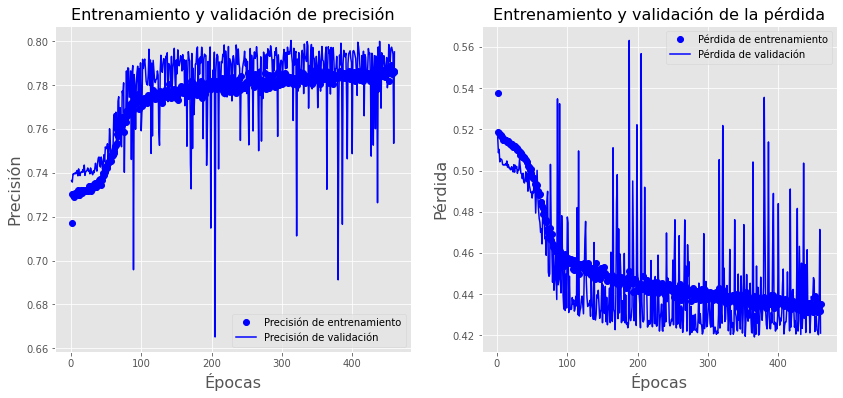

In [84]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(epochs, accuracy, 'bo', label='Precisión de entrenamiento')
ax[0].plot(epochs, val_accuracy, 'b', label='Precisión de validación')
ax[0].set_title('Entrenamiento y validación de precisión', fontsize=16)
ax[0].set_xlabel('Épocas', fontsize=16)
ax[0].set_ylabel('Precisión', fontsize=16)
ax[0].legend()

ax[1].plot(epochs, loss_values, 'bo', label='Pérdida de entrenamiento')
ax[1].plot(epochs, val_loss_values, 'b', label='Pérdida de validación')
ax[1].set_title('Entrenamiento y validación de la pérdida', fontsize=16)
ax[1].set_xlabel('Épocas', fontsize=16)
ax[1].set_ylabel('Pérdida', fontsize=16)
ax[1].legend()

Se denota usando las curvas que el modelo llega hasta el 80% al usar diversos valores de epochs, por lo tanto. Usando esta información, se corre de nuevo la red con un valor menor de epochs, siempre y cuando se encuentre por arriba de 100, que es cuando alcanza su mejor performance.

In [82]:
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=160, batch_size=20, verbose=0)

In [83]:
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

715/715 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.7950

 Training Accuracy: 0.7949581742286682
307/307 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.7986

 Testing Accuracy: 0.7986316680908203


Al correr la red usando el nuevo número de epochs se denote que la precisión de testeo mejoró en un 0,3%, alcanzando un 79,86%.

**Conclusión**

Tanto la red neuronal como el random forest permiten encontrar modelos que se desempeñan adecuadamente ante el data set presentado en el problema, alcanzando niveles que rondan el 80% de precisión para los datos de validación, en ambos casos. 

Estos buenos niveles de precisión pueden deberse a que la limpieza realizada a los datos fue adecuada, además de que se trata de modelos sumamente poderosos y que se ajustaron de buena manera a los datos en cuestión. De hecho, usando el gráfico obtenido de las variables importantes para el modelo, se podría correr uno nuevo solamente con las 5 variables que explican el 85% de la variabilidad, para ver cómo se comporta la precisión en este caso, y ver si las demás variables podrían dejar de medirse. 

Finalmente, se resalta que si bien el tuneo de hiperparámetros mejora un poco el modelo en ambos casos, no resulta una mejoría sustancial en cuanto a precisión, pero sí en la eficiencia del modelo, al reducir el número de árboles en el random forest y el número de epochs en la red neuronal. 